In [2]:
# Loan Approval Prediction using Machine Learning

## Objective
#To predict whether a loan will be approved or not based on applicant details
#using Machine Learning algorithms.


   Gender Married     Education Self_Employed  ApplicantIncome  \
0    Male     Yes      Graduate            No             5000   
1  Female      No      Graduate            No             3000   
2    Male     Yes  Not Graduate           Yes             4000   
3    Male     Yes      Graduate            No             6000   
4  Female      No      Graduate            No             2500   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0         150               360               1   
1               1500         100               360               1   
2                  0         120               360               0   
3               2000         200               360               1   
4                  0          80               360               1   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2     Semiurban           N  
3         Urban           Y  
4         Rural           Y  
<c

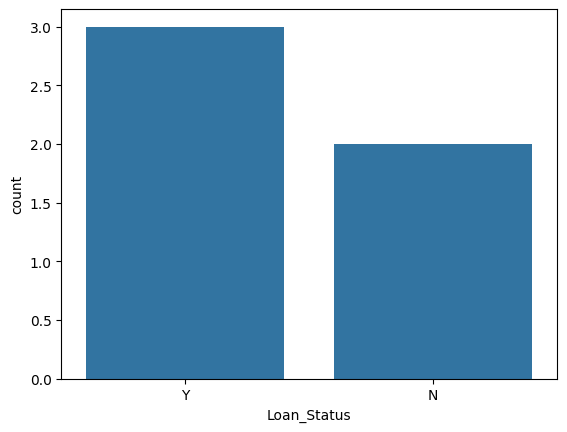

Accuracy: 0.0
Confusion Matrix:
 [[0 1]
 [0 0]]


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but LogisticRegression is expecting 10 features as input.

In [14]:
# Loan Approval Prediction using Machine Learning (Jupyter Notebook)

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
data = pd.read_csv("loan_data.csv")

# Display first few rows
print(data.head())

# Check dataset information
print(data.info())
print(data.isnull().sum())

# Handle missing values
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

# Visualize loan status
sns.countplot(x='Loan_Status', data=data)
plt.show()

# Encode categorical variables
le = LabelEncoder()
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for col in cols:
    data[col] = le.fit_transform(data[col])

# Encode target variable
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

# Split features and target
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model prediction
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Predict loan approval for new applicant
new_applicant = np.array([[1, 1, 0, 5000, 0, 150, 1, 1, 2]])
prediction = model.predict(new_applicant)

if prediction[0] == 1:
    print("Loan Approved ✅")
else:
    print("Loan Rejected ❌")


In [9]:
X.columns


Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [11]:
new_applicant = pd.DataFrame([{
    'Gender': 1,
    'Married': 1,
    'Education': 0,
    'Self_Employed': 0,
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 0,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 2
}])


In [12]:
prediction = model.predict(new_applicant)

if prediction[0] == 1:
    print("Loan Approved ✅")
else:
    print("Loan Rejected ❌")


Loan Approved ✅


In [13]:
model.fit(X, y)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul